<a href="https://colab.research.google.com/github/Saiteja540/Telecom_Churn_Analysis/blob/main/Copy_of_TelecomChurn(Saiteja).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **TELECOM CHURN ANALYSIS**

Description : 
Orange S.A., formerly France Telecom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.
Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention.


Submission by ***Goli Saiteja***

**Step 1 - Import all required modules**

In [1]:
#import required packages
import numpy as np
import pandas as pd
#import data visualisation packages
import matplotlib.pyplot as plt
import seaborn as sns


Step 2 : **Upload the Data Set**

In [2]:
#mount the drive
from google.colab import drive
from google.colab import files
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#insert the drive file
dir_path = '/content/drive/MyDrive/Almabetter/Copy of Telecom Churn.csv'
df = pd.read_csv(dir_path)

In [4]:
#starting 10 records
df.head(10)


,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False
5,AL,118,510,Yes,No,0,223.4,98,37.98,220.6,101,18.75,203.9,118,9.18,6.3,6,1.70,0,False
6,MA,121,510,No,Yes,24,218.2,88,37.09,348.5,108,29.62,212.6,118,9.57,7.5,7,2.03,3,False
7,MO,147,415,Yes,No,0,157.0,79,26.69,103.1,94,8.76,211.8,96,9.53,7.1,6,1.92,0,False
8,LA,117,408,No,No,0,184.5,97,31.37,351.6,80,29.89,215.8,90,9.71,8.7,4,2.35,1,False
9,WV,141,415,Yes,Yes,37,258.6,84,43.96,222.0,111,18.87,326.4,97,14.69,11.2,5,3.02,0,False


In [5]:
#last 10 records
df.tail(10)

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [6]:

#print shape of data set(prints number of rows and columns)
print(df.shape)

(3333, 20)


In [7]:
#print all columns
df.columns


Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [8]:
df.dtypes


State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [10]:
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [11]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [12]:
#
df1 = df.groupby(['State','Churn'])
df1.first()

Account length  Area code International plan Voice mail plan  \
State Churn                                                                 
AK    False              36        408                 No             Yes   
      True              126        415                 No              No   
AL    False             118        510                Yes              No   
      True               86        415                 No              No   
AR    False              34        510                 No              No   
...                     ...        ...                ...             ...   
WI    True               16        510                 No              No   
WV    False             141        415                Yes             Yes   
      True               72        510                 No             Yes   
WY    False              57        408                 No             Yes   
      True               87        415                 No              No   

             Number vmail messages  Total day minutes  Total day calls  \
State Churn                                                              
AK    False                     30              146.3              128   
      True                       0               58.2               94   
AL    False                      0              223.4               98   
      True                       0              128.3              121   
AR    False                      0              124.8               82   
...                            ...                ...              ...   
WI    True                       0              229.6               78   
WV    False                     37              258.6               84   
      True                      33               96.6               59   
WY    False                     39              213.0              115   
      True                       0              151.0               83   

             Total day charge  Total eve minutes  Total eve calls  \
State Churn                                                         
AK    False             24.87              162.5               80   
      True               9.89              138.7              118   
AL    False             37.98              220.6              101   
      True              21.81              197.1               93   
AR    False             21.22              282.2               98   
...                       ...                ...              ...   
WI    True              39.03              205.7              108   
WV    False             43.96              222.0              111   
      True              16.42              315.4               98   
WY    False             36.21              191.1              112   
      True              25.67              219.7              116   

             Total eve charge  Total night minutes  Total night calls  \
State Churn                                                             
AK    False             13.81                129.3                109   
      True              11.79                136.8                 91   
AL    False             18.75                203.9                118   
      True              16.75                138.4                152   
AR    False             23.99                311.5                 78   
...                       ...                  ...                ...   
WI    True              17.48                166.2                 91   
WV    False             18.87                326.4                 97   
      True              26.81                163.3                117   
WY    False             16.24                182.7                115   
      True              18.67                203.9                127   

             Total night charge  Total intl minutes  Total intl calls  \
State Churn                                                             
AK    False                5.82                14.5   

In [13]:
print(df.Churn.value_counts())

False    2850
True      483
Name: Churn, dtype: int64


**Finding out Missing or Duplicate Values**

In [14]:
df.isna().sum()
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [15]:
len(df[df.duplicated()])

0

**Renaming the Columns**

In [16]:
df.columns=['State', 'AccountLength', 'AreaCode', 'InternationalPlan',
       'VoiceMailPlan', 'NumberVmailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalDayCharge', 'TotalEveMinutes',
       'TotalEveCalls', 'TotalEveCharge', 'TotalNightMinutes',
       'TotalNightCalls', 'TotalNightCharge', 'TotalIntlMinutes',
       'TotalIntlCalls', 'TotalIntlCharge', 'CustomerServiceCalls',
       'Churn']
df.columns

Index(['State', 'AccountLength', 'AreaCode', 'InternationalPlan',
       'VoiceMailPlan', 'NumberVmailMessages', 'TotalDayMinutes',
       'TotalDayCalls', 'TotalDayCharge', 'TotalEveMinutes', 'TotalEveCalls',
       'TotalEveCharge', 'TotalNightMinutes', 'TotalNightCalls',
       'TotalNightCharge', 'TotalIntlMinutes', 'TotalIntlCalls',
       'TotalIntlCharge', 'CustomerServiceCalls', 'Churn'],
      dtype='object')

**Data Analysis on Telecom Churn Data set, of a Telecom Company**

**1. DIstribution of Churned and Non Churned Users**

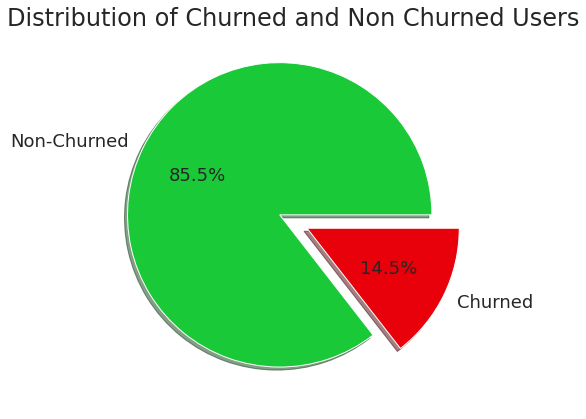

In [29]:
#naming labels
labels=["Non-Churned","Churned"]
values=list(df.Churn.value_counts())
#Making and customising the visualisation
color=sns.color_palette('bright')[2:6]
explode=(0.1,0.1)
#plotting the data(takes parameters such as lables, values, color, shadow, explode(incase of highlighting the seperating part), text font size)
plt.pie(values, labels = labels, colors=color, autopct='%1.1f%%',shadow=True,explode=explode,textprops={'fontsize': 18})
plt.title("Distribution of Churned and Non Churned Users",size=24)
plt.show()

**1.By this Pie chart, we can say that out of 3333 users, 2850 users are retained by comapny, which equals of 85.5% of user share.**

**2.14.5% of users left the company, which equals 483 users**

***2. Determining number of churned and not churned users on the basis of Customer Service Calls***

In [18]:
#Creating a dataframe to calculate the churned users for different number of Customer Service Calls
churn_true=pd.DataFrame(df[df["Churn"]==True].groupby("CustomerServiceCalls",as_index=False)["Churn"].count())
churn_true.rename(columns={"Churn":"ChurnCount"},inplace=True)

#Creating a dataframe to calculate the NonChurned users for different number of Customer Service Calls
churn_false=pd.DataFrame(df[df["Churn"]==False].groupby("CustomerServiceCalls",as_index=False)["Churn"].count())
churn_false.rename(columns={"Churn":"NotChurnCount"},inplace=True)

#Calculating the total number of churned and non churned users
total_churned_users=churn_true["ChurnCount"].sum()
total_not_churned_users=churn_false["NotChurnCount"].sum()

#Calculating the percentage of churned and non-churned users 
churn_true["Churned"]=(churn_true["ChurnCount"]/(total_churned_users))*100
churn_false["NotChurned"]=(churn_false["NotChurnCount"]/(total_not_churned_users))*100

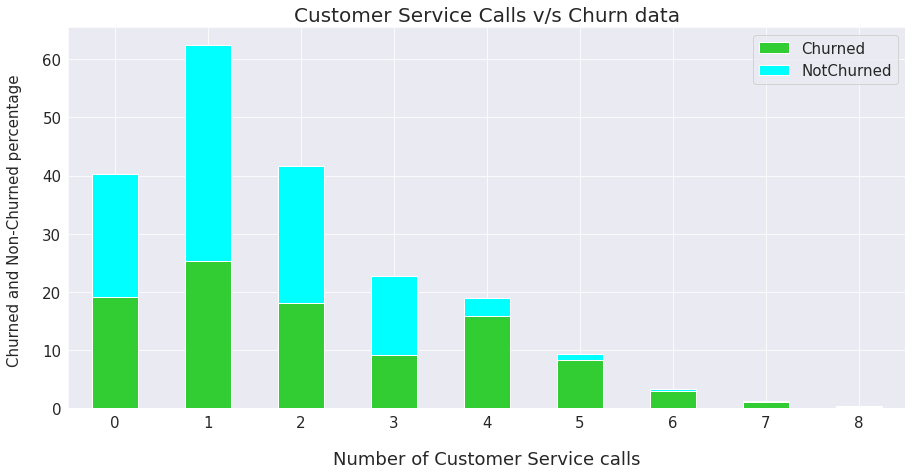

In [30]:
#Creating a new dataframe by merging churn_true and churn_false dataframes
new_df=pd.merge(churn_false,churn_true,on="CustomerServiceCalls")
df_churn=new_df[["CustomerServiceCalls","Churned","NotChurned"]]
#plotting the data
df_churn.set_index('CustomerServiceCalls').plot(kind='bar',stacked=True,color=['limegreen','aqua'])
plt.title("Customer Service Calls v/s Churn data", size=20)
plt.xticks(rotation=0)
plt.ylabel("Churned and Non-Churned percentage ",size=15,labelpad=20)
plt.xlabel("Number of Customer Service calls",size=18,labelpad=20)
plt.legend(prop={"size":15})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.savefig('customerservicecallchurn.png')
#files.download('customerservicecallchurn.png')
plt.show()

**1.By this bar chart visualization, we can say that the number of users who has done customer service calls frequently leave the comapny, whereas less number of users where retained.**

**Maximum customer retention on basis of customer service calls, is about 2 calls.**

**Customers who contacted Customer service team more than 2 times, left the telecom company services**



**3.*Distribution of Revenue accross different timelines in a day, and comparing them with revenue from International Calls***

In [20]:
#calaculating totals of revenue recieved by telecom company, categorizing as day revenue, evening revenue, night revenue, international revenue
#day revenue = total sum of all charges obtained from users who call during day time
#evening revenue = total sum of all charges obtained from users who call during evening time
#night reevnue = total sum of all charges obtained from users who call during night time
#international revenue = total sum of all charges obtained from users who use international call service
dayrevenue=df.TotalDayCharge.sum()
everevenue=df.TotalEveCharge.sum()
nightrevenue=df.TotalNightCharge.sum()
internationalrevenue=df.TotalIntlCharge.sum()
print(dayrevenue)
print(everevenue)
print(nightrevenue)
print(internationalrevenue)


101864.17000000001
56939.44
30128.07
9214.349999999999


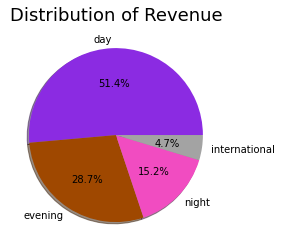

In [21]:
#creating labels for data
labels=["day","evening","night","international"]
values=[dayrevenue,everevenue,nightrevenue,internationalrevenue]
#setting color for plot
color=sns.color_palette('bright')[4:8]
#plotting the data
plt.pie(values, labels = labels, colors=color, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 10})
plt.title("Distribution of Revenue", size=18)
plt.show()

**By this Pie chart distribution, it is evident that, most of revenue to telecom company is recieved during day time, and evening time,**

**Also user count who avail International services are very less, so company needs to check on this too**

***4.Distribution of Customer Service Calls, across different States***

No handles with labels found to put in legend.


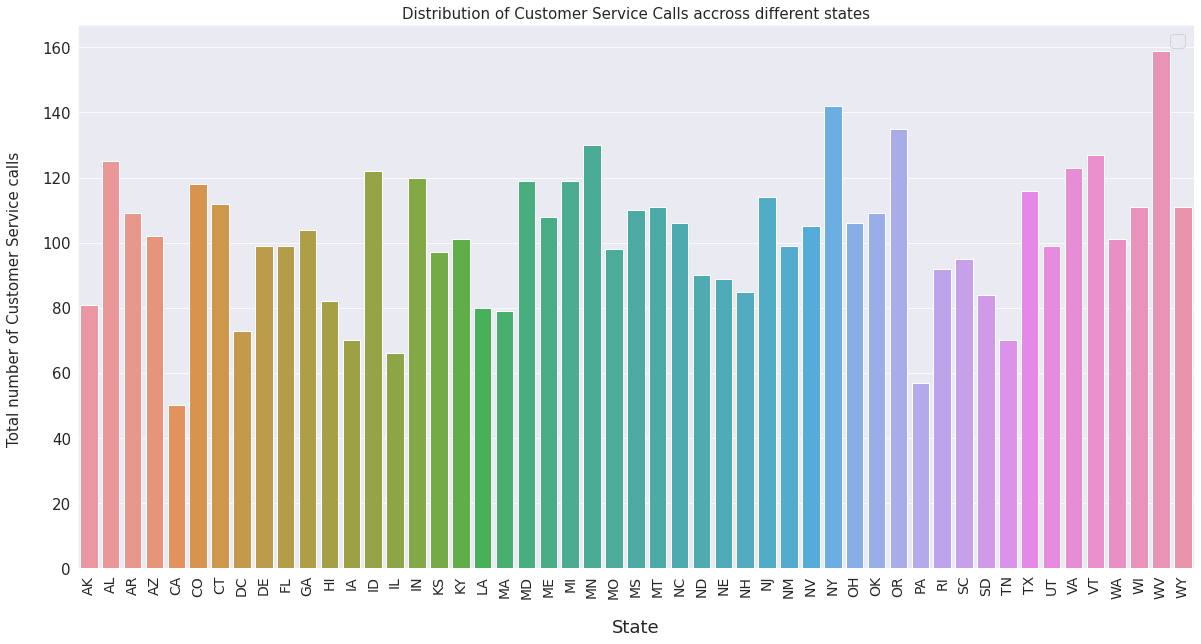

In [22]:
countofservicecalls=df.CustomerServiceCalls.sum()
#applying group by on State, CustomerService calls(sum of Customer Service calls)
df5 = df.groupby(by=['State'],as_index=False)['CustomerServiceCalls'].sum()
plt.rcParams["figure.figsize"] = [20,10]
#setting style for data
sns.set_style('darkgrid')
vis1=sns.barplot(x="State",y="CustomerServiceCalls",data=df5)
#making and customising visualization
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.title("Distribution of Customer Service Calls accross different states",size=15)
plt.ylabel("Total number of Customer Service calls ",size=15,labelpad=20)
plt.xlabel("State",size=18,labelpad=20)
plt.legend(prop={"size":18})
plt.savefig('statewisenetworkusage.png')
plt.show()




**1. From this Bar graph, we can conclude that...**


1.   Alabama, Arkansas, Arizona, Colorado, Connecticut, Ildaho, Indiana, Maryland, Maine, Michigan,Ohio,Minnesota,Mississipi,Montana,New Jersey,New york,Oregon, West Virginia,	Texas,Utah,Virginia,Vermont,Wyoming,Montana - are the states from which company has received more number of service calls.
2.   Alaska, District of Columbia, Delware,Florida,Hawaii,Kansas,Kentucky,Lousiana,Massacheusetts,Rhode Island,South Carolina,South Dakota, Washington are the states from which customer service calls are received in medium range





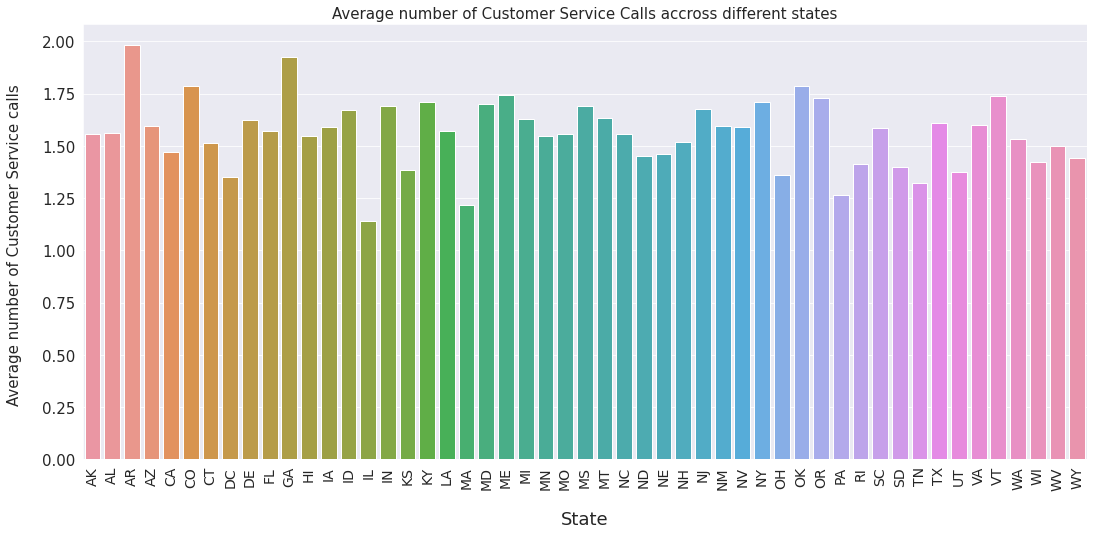

In [23]:
#Added for question 4
#Creating a dataframe with number of customer service calls in each state
df_service_calls = df.groupby(by=['State'],as_index=False).agg(Service_calls=('CustomerServiceCalls','sum'),Number_of_users=('State','count'))

#Creating a new column to calculate the number of average customer service calls for each state
df_service_calls["average_service_calls"]=df_service_calls["Service_calls"]/df_service_calls["Number_of_users"]

#Setting the figure size parameters
plt.rcParams["figure.figsize"] = [18, 8]

#Setting the style of the plot
sns.set_style('darkgrid')

#Making and customising the visualisation
vis2=sns.barplot(x="State",y="average_service_calls",data=df_service_calls)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=15)
plt.title("Average number of Customer Service Calls accross different states",size=15)
plt.ylabel("Average number of Customer Service calls ",size=15,labelpad=20)
plt.xlabel("State",size=18,labelpad=20)
#plt.savefig('avgservicecalls.png')
#files.download('avgservicecalls.png')
plt.show()

***5. Labelling of States, as per the Customer Service Calls received***

CustomerServiceCalls    102.137255
Name: mean, dtype: float64 CustomerServiceCalls    21.317617
Name: std, dtype: float64


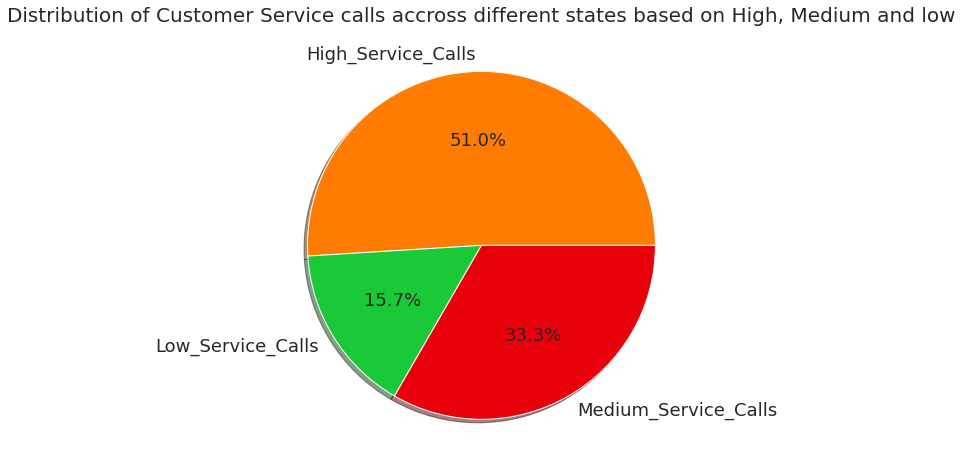

In [24]:
l=[]
mean=df5.describe().transpose()["mean"]
std=df5.describe().transpose()["std"]
print(mean,std)
#creating a label function, which labels the customer serice calls
#if the state records the count of customer service calls more than the mean of count of customer service calls, then it is labelled as 
#High Servica calls
#if a state records the count of customer serice calls more than difference of mean and standard deviation of customer service calls, but less than mean of cutomer service calls
#then it is labelled as MEDIUM SERVICE CALLS
#rlse, in either of cases it fails, it is labelled as LOW SERVICE CALLS
def labeller(a):
  if a>mean['CustomerServiceCalls']:
    return "High_Service_Calls"
  elif a>mean['CustomerServiceCalls']-std['CustomerServiceCalls']:
    return "Medium_Service_Calls"
  else:
    return "Low_Service_Calls"

#applying the function to the dataframe
df5["label"]=df5.loc[:,"CustomerServiceCalls"].apply(labeller)
df5[df5["label"]=="High_Churn"].loc[:,["State","label"]]
#apply group by with the labels such as High service calls, medium and low service calls with count of service calls
df7=df5.groupby("label")["label"].count()
labels=list(df7.index)
values=list(df7.values)
#setting color to the pie chart
color=sns.color_palette('bright')[1:4]
#plotting the data
plt.pie(values, labels = labels, colors=color, autopct='%1.1f%%',shadow=True,textprops={'fontsize': 18})
plt.title("Distribution of Customer Service calls accross different states based on High, Medium and low", size = 20)
plt.show()


***6.Distribution of Voice Mail Plans across different States***

In [25]:
VoiceMailPlan_Count=df.VoiceMailPlan.value_counts()

In [26]:
df4=df[df['VoiceMailPlan']=="Yes"].groupby('State',as_index="False")['VoiceMailPlan'].count()

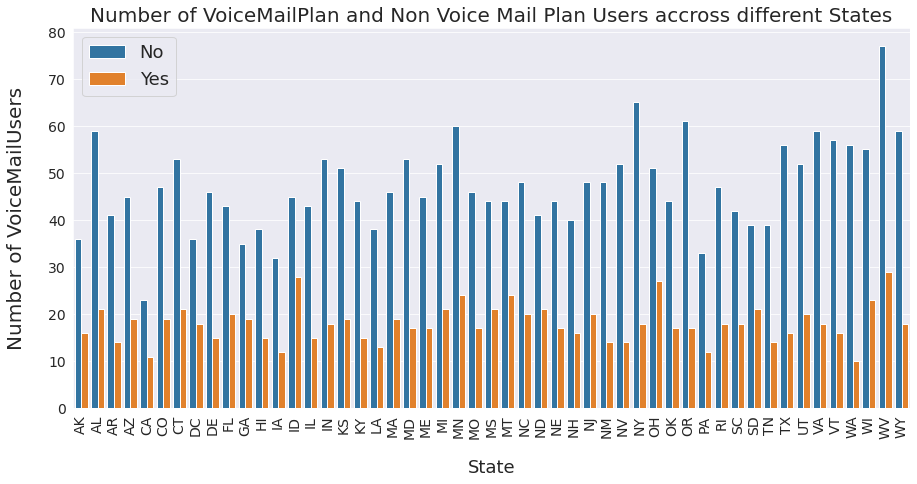

In [27]:
#apply group by for state and voice mail plan(applying aggregate function, it gives value of number of users who use voice mail plan divided by number of users)
VoiceMailPlan_Distribution=df.groupby(by=["State","VoiceMailPlan"],as_index=False).agg(VoiceMailPlan_Count=("VoiceMailPlan","count"))
#Setting figure size for parameters
plt.rcParams["figure.figsize"] = [15, 7]
#setting style for plot data
sns.set_style('darkgrid')
#customizing the plot
vis1=sns.barplot(x="State",y="VoiceMailPlan_Count",data=VoiceMailPlan_Distribution,hue="VoiceMailPlan",dodge=True)
plt.xticks(rotation=90,fontsize=14)
plt.yticks(fontsize=14)
plt.title("Number of VoiceMailPlan and Non Voice Mail Plan Users accross different States",size=20)
plt.ylabel("Number of VoiceMailUsers",size=20,labelpad=22)
plt.xlabel("State",size=18,labelpad=20)
plt.legend(prop={"size":18})
plt.savefig('statewise_churn.png')
plt.show()

**1. West Virginia state records with more number of users opted for Voice mail plan**

**2. California state records less number of users opted for Voice mail plan**